# BIA 6304 Text Mining, Fall 2019 - Assignment 2
### by Sara Lienau

# Table of Contents

- [Question 1 - Newsletter Quotables](#Question-1---Newsletter-Quotables)
- [Question 2 - Preprocessing Text](#Question-2---Preprocessing-Text)
- [Question 3 - Sentiment Analysis](#Question-3---Sentiment-Analysis)
- [Task 1 - Basic EDA ](#Task-1---Basic-EDA)
- [Task 2 - Preprocess Text](#Task-2---Preprocess-Text)
- [Task 3 - Sentiment Analysis](#Task-3---Sentiment-Analysis)
  - [Using AFINN](#Use-AFINN-Dictionary)
  - [Using Hu and Liu](#Use-Hu-and-Liu-Dictionary)
  - [Using NRC Emotional Lexicon](#Use-NRC-Emotional-Lexicon-Dictionary)
- **The Fun Part - Explore Results!**
  - [Most Positive and Negative Quotes](#Explore-Most-Positive-and-Negative-Quotes)
  - [Emotion Expressed](#Explore-Quotes-by-Emotion-Expressed)
    - [Anticipation](#Anticipation)
    - [Disgust](#Disgust)
  - [Word Cloud](#Word-Cloud-of-Terms-in-Quotes---Just-for-Fun)

# Question 1 - Newsletter Quotables

**Business Question**

For Assignment 2, I am continuing to mine text from the WSJ Pro Artificial Intelligence newsletters. The overall goal of my project is to use the newsletters in a literature review to learn more about where businesses are using AI. About twice a week, a newsletter contains a highlighted quote like the example below. For Assignment 2, I am analyzing the text of the quotes.  My assumption is that the publisher believes there is value in calling attention to the quotes. At a minimum, I am interested in whether the sentiment of the quote is generally positive/encouraging or negative/concerning about the uses of AI. This is useful in assessing if there is a prevalent bias in the source material of my AI literature review. That is, are quotes mostly positive (adding to the AI hype), mostly negative (doom and gloom) or a reasonable balance.
<!-- <img src="images/example_quote.png" width=500 height=300> -->
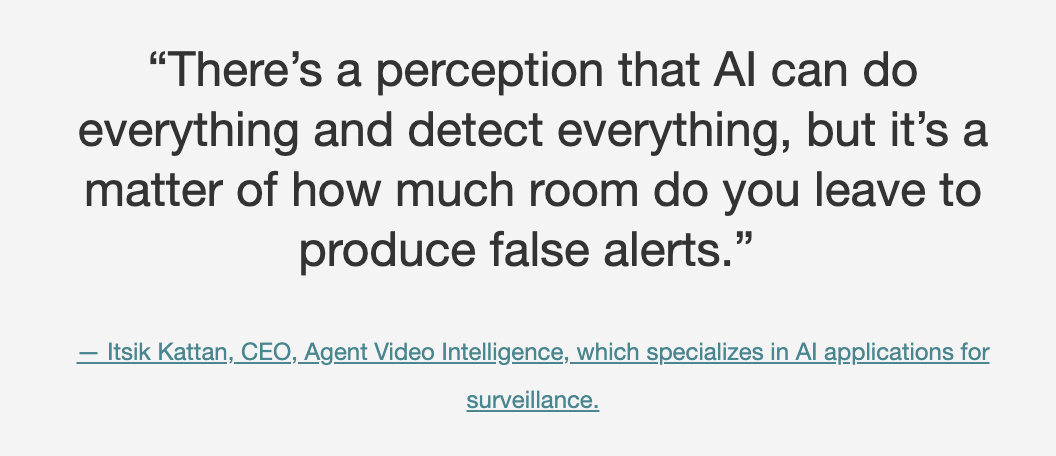

> *My collection of 160 newsletters (from Jan-Aug 2019) **contains 63 quotes** (a quote = a document in my corpus). The quotes consist of **a sentence or two**. So, I have more text to analyze without being overwhelmed (**about 15-30 words per quote**, as compared to 3-6 words per article title from Assignment 1).*

**Exploratory Data Analysis**

I performed a cursory EDA on the quotes.  I created a default CountVectorizer to tokenize the quotes and get a sense of the shape of my corpus -- **63 documents (quotes) and 627 features (words)**.  Then I mostly scanned the terms - by frequency of occurrence in documents/quotes or just alphabetically looking for similar forms of words.
- By frequency, as expected, the top 25 or so words look like **stop words** (e.g., to, the, of, and).  I expect I will exclude stop words to eliminate noise in my feature space and these words are unlikely to aid in determining the sentiment of the text.
- **Common Root Words** - I did detect cases of multiple forms of a common root word.  
  - For example, help/helping, effective/effectively/effectiveness, emotion/emotions, choice/choices.  I noted to review sentiment dictionaries to determine which form(s) of the words they contain.  I will need to explore stemming and lemmatization.  And determine which helps me align my text with form of words in the sentiment dictionaries.
  - Also, I ran across words with the same root but a different part of speech where it may not make sense to attempt to consolidate. For example, for competition (noun), competitive (adjective), competitors (noun) it may not make sense to consolidate to the root "compete."
- **Contractions**
  - I ran across some odd tokens (re, ve) and chase those down to contraction (we're => we are; they've => they have).  I made a note to explore how contractions are handled with the default stop word lists.  Are they natively handled based on how a string is tokenized or is it necessary (or useful) to expand the contractions.
  - Two Special Cases - not contraction and possessives.  
    - For sentiment analysis, I suspect it may be useful to expand n't to not and retain rather than eliminate as a stop word.
    - Also, I saw a couple of possessives in the quotes (e.g., Moore's law and Today's).  I suspect expansion will translate 's into is (Moore is law, Today is ...).  I will have to watch and see if those cause me any problems.

# Question 2 - Preprocessing Text

The goal of the assignment is sentiment analysis, so I focused on preprocessing the text to improve matches of my terms with entries in the sentiment dictionaries. In the original text, about 12% of my terms were found in the AFINN or Hu and Liu dictionaries (70 or 80 of my 627 features). I then investigated the 550 terms that were not in the sentiment dictionary and assessed what kind of preprocessing was useful.

- The **sentiment dictionaries contained multiple forms of words**, so I did not need to get all words to their essential root form. For example, the dictionaries included entries for all of the following: effective/effectively, fail/failed, help/helping, as well as good/great/greatest
- **Contractions** (e.g., it’s, we’re, shouldn’t) were not included in the sentiment dictionaries, and these often involved stop words. The NLTK default stop word list contained entries that would eliminate tokenized forms of contractions (e.g., don/don’t, aren/aren’t, ve/we’ve). However, this would also remove contractions involving “not” (e.g., shouldn’t, don’t). I thought I should retain the term “not” as it might aid in understanding sentiment. I decided to **expand the contractions, but keep “no” and “not”** in the text. **Using scikit-learn’s stop words, I removed** about 30% more stop words/noise (129 terms vs. 92). That cut the mismatches to investigate down by about 25% (about 430 terms).
- To consolidate multiple forms of words, I **lemmatized** the cleaned-up text. This mainly swapped **plurals for the singular** form of the word (e.g., humans/human, bodies/body) and sometimes misfired (e.g., serves to serf).  I was surprised! I thought lemmatization would help get words to their common root.  Lemmatization had a negligible impact on improving matches in the sentiment dictionary because the dictionaries often contain both the singular and plural forms of a word.  Lemmatization increased matches by a couple of terms and eliminated a dozen non-matches.

My preprocessing consisted of expanding contractions, removing stop words and consolidating terms to their singular (vs. plural) form.  I did not increase matches with terms contained in the sentiment dictionaries (still 70-80 terms) but I excluded noise in the non-matches from further research.

# Question 3 - Sentiment Analysis

I started with the AFINN and Hu and Liu sentiment dictionaries and examined which terms in a quote had a match in the dictionary and contributed to determining the sentiment. With less than 20% of my terms in the sentiment dictionaries, there was really too little information to develop a good read on the sentiment expressed.  I did not spend much time experimenting with the formula to assign a sentiment label.   I did not experience much difference using the original text versus my processed text.  This is because often the sentiment dictionaries contain both the singular and plural forms of a words.  Processing a quote, the function would find different forms of similar words but ultimately generated the same score/label.

Next, I pivoted to using the NRC Emotional Lexicon dictionary, which contained entries for about 58% of the words in my newsletter quotes. In addition to positive and negative sentiment, this dictionary also included information about whether a word was associated with eight emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust). I divided the emotions into positive and negative buckets and assigned a weight based on my view of the strength of the emotion (e.g., disgust – highly negative, or trust – generally positive). To determine an overall positive/negative sentiment, I accumulated the weights of the terms/emotions within each quote. The sentiment label assigned to each quote generally matched my intuition (although, not perfect). Also, I had a numeric score to help assess the strength of the sentiment and the emotions detected in the quotes. All very helpful!

Although I’m generally pleased with the results of using NRC EmoLex for sentiment analysis, additional work could improve the process.
- There are some terms in AFINN and HL that are not included in the NRC data. I could expand my NRC dictionary to include those additional terms and at a minimum associate them with the positive or negative sentiment, even without any information on the eight emotions (or use my judgment). This would include objective information on a few more terms in my quotes.
- I may want to use custom dictionary replacement in cases where the individual terms of a phrase overlap with sentiment dictionary entries which may not be representative of the phrase. For example, when the phrase ‘machine learning’ is processed, ‘machine’ is associated with the emotion trust and ‘learning’ with a positive sentiment. That’s a nice view of machine learning, but I am not sure it is accurate for the phrase. Other cases include ‘real estate’ (real associated with emotion trust); Moore’s law (law associated with trust); or situations where artificial intelligence is used rather than the abbreviation AI (intelligence is associated with the emotions fear, joy and trust)
- For a robust sentiment analysis, I should dig into the terms in my text that are not in the sentiment dictionaries. I should analyze which terms are domain-specific words or phrases that are helpful and develop a dictionary to include those terms (e.g., maybe humans, humanity, jobs, repetitive).
- I retained "not" and "no" in my text, rather than eliminating as stop words.  I should expand the logic to calculate a sentiment score by tracking the previous word and then invert the sign on the weight of the associated emotions that follow the terms not or no.

# Setup for Tasks

### Documentation
- [NLTK](http://www.nltk.org/) - Natural Language Toolkit  
- [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
- [Tfidf Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)  
- [Python Sets](http://www.python-course.eu/python3_sets_frozensets.php) - 
good reference for all the set math in python  

In [1]:
# -------------------------------------------------------------------------
# import module(s) into namespace
# -------------------------------------------------------------------------
import pandas as pd
import numpy as np

# # not using right now
#
# from bs4 import BeautifulSoup
# import requests
# import datetime

from sklearn.feature_extraction.text import CountVectorizer
import math

# from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('display.max_colwidth', 1000) #important for getting all the text

%matplotlib inline

## Load Corpus Data from a File

In [2]:
# -------------------------------------------------------------------------
# setup variables
#   text_column - which column of DataFrame has text of interest
#   corpus_df   - read in desired file of data into DataFrame named "corpus_df"
# -------------------------------------------------------------------------
text_column = 'Quote'
corpus_df   = pd.read_csv("newsletter_quotes.csv") 

print("Shape of Corpus is ", corpus_df.shape)
#corpus_df.head()
corpus_df.tail()

Shape of Corpus is  (63, 3)


,Date,Quote,Attribution
58,"Thursday, January 17th",If we can achieve true consciousness in machines ... then we can teach them to care.,"David Hanson Jr., founder and Chief Executive Officer of Hanson Robotics Ltd."
59,"Tuesday, January 15th",AI will increasingly replace repetitive jobs. Not just for blue-collar work but a lot of white-collar work.,AI venture capitalist Kai-Fu Lee on CBS's '60 Minutes'
60,"Monday, January 14th","Cognitive labor has shot through the roof. And we can feel it -- so much information, so many choices that demand our attention... No wonder we feel more tired than ever.","I.P. Park, president and chief technology officer of LG Electronics"
61,"Friday, January 11th",The big changes this year versus last year is the humanization of AI and how completely ubiquitous it has become into our lives.,"Allan Cook, the digital reality business leader at Deloitte Digital."
62,"Thursday, January 10th","Golf is the perfect sport for analytics, because everything is a discrete action.","Tom Williams, executive vice president, Arccos, a Stamford, Conn. company that has developed an AI-powered digital caddie."


## Common Funtions

In [3]:
# -------------------------------------------------------------------------
# Given data from a vectorizer, return a sorted list of features 
# -------------------------------------------------------------------------
def get_sorted_features(features_array, features_names):
    # count the number of documents where the feature exists
    document_count = np.sum(features_array, axis=0) 

        # convert list to array to sum up feature existence (0,1) (i.e., sum for each column)
        # note: (axis=0 calc/sum by column, axis=1 calc by row)

    df = pd.DataFrame(document_count.tolist(), index=features_names, columns=['Documents'])

        # create a dataframe from the list (note: converting numpy array 'document_count' to a list)

    return df.sort_values(['Documents'], ascending = False) 

# -------------------------------------------------------------------------
# for given feature, return original data from corpus
# -------------------------------------------------------------------------
def search_corpus(feature, df=corpus_df, column_name=text_column):
    search_token_pattern = '(?u)\\b{}\\b'.format(feature)
    return df[df[column_name].str.contains(search_token_pattern, regex=True)]

# Task 1 - Basic EDA
## What preprocessing may be necessary?

- Create and apply the default CountVectorizer on the corpus
  - Get basic shape.  **63 Documents and 627 Features (words)**
  - Review word length of documents (as a comparison to Assignment 1 article titles).  **Mean 20, IQR 14-27, Range 3-41 words**
- Examine terms by frequency the terms occur in corpus (# documents=quote)
  - **Most of top 25 look like stop words.  Should exclude stop words that don't add meaning to analysis.**
    - Which stop word list will work best?  NLTK, sklearn, custom?
- Scan terms alphabetically - looking for similar forms of words.  Sometimes looked at document/quote containing some item of interest to assess the context.
  - Common root word
    - help, helping
    - effective, effectively, effectiveness - all some form of effective
      - **Will stemming or lemmanization address? Are different forms of words included in sentiment dictionaries?  If so, there is less need to clean up in text.**
    - *TBD does it make sense to collapse the following to the same root word?  They are different POS which may impact meaning/analysis*
    - competition, competitive, competitors - noun, adjective, noun
    - engineer, engineering - noun/verb, noun
  - Singular & plural form of terms
    - emotion/emotions, choice/choices, enterprise/enterprises
    - **Similar to note on Common Root Word.  Is it necessary to clean up? If so, then how: stemming, lemmanization, custom replacement.**
  - Other issues
    - default regex for token - missing abbreviations (U.S., A.G.I), hyphenated words (self-sufficient, non-technical, first-mover, blue-collar)
    - contractions - breaking piece before and after the apostrophe
      - don't, aren't, it's, we're, that's, we've
      - **Do STOP WORDS handle conjuctions or do I need to expand with a custom dictionary?**
      - **If expand contractions in many cases one or both the expanded pieces are Stop Word candidate**
      - **But probably should retain "not", probably important for sentiment analysis**
    - possessives - losing the ('s) portion - not sure that will really be a problem
      - Moore's law, today's

In [4]:
# -------------------------------------------------------------------------
# Use default Count Vectorizer
# -------------------------------------------------------------------------
cv_words_exist = CountVectorizer(binary=True) 

words_exist_dm = cv_words_exist.fit_transform(corpus_df[text_column])

# -------------------------------------------------------------------------
# Shape of feature space
# -------------------------------------------------------------------------
print("{} Documents and {} Features".format(words_exist_dm.shape[0], words_exist_dm.shape[1]))

63 Documents and 627 Features


       Nbr_of_Words
count     63.000000
mean      20.460317
std        9.033674
min        3.000000
25%       14.000000
50%       19.000000
75%       27.000000
max       41.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a250e30f0>]],
      dtype=object)

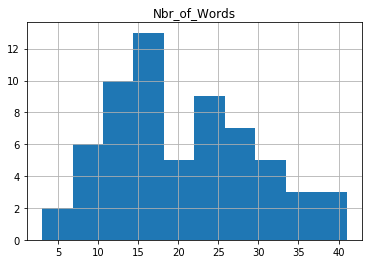

In [5]:
# -------------------------------------------------------------------------
# Examine distribution of number of words in each document (quote)
# -------------------------------------------------------------------------
count_words = np.sum(words_exist_dm.toarray(), axis=1)
    # sum by row - words per title

count_words_df = pd.DataFrame(count_words.tolist(), columns=['Nbr_of_Words'])

# summary statistics
print(count_words_df.describe())

# histogram
count_words_df.hist(bins=10)

In [6]:
# -------------------------------------------------------------------------
# Get features created by Count Vector
# -------------------------------------------------------------------------
features_names = cv_words_exist.get_feature_names()
features_names_text = features_names

In [7]:
# -------------------------------------------------------------------------
# Examine Features/Terms by Frequency of Documents/Quote where Terms exists
# -------------------------------------------------------------------------
sorted_count_df = get_sorted_features(words_exist_dm.toarray(), features_names)
print(sorted_count_df.head(25))

print('~~~~~~~~~~')

# other than 'ai' (in 23 of 63 documents/quotes), generally look like stop words
# ai, technology, not - are the only non-stop word in top 25

print(sorted_count_df.tail(20).index)

# low frequency words more interesting - hardware, hammer (?), great, government, golf (?), genie (?)

            Documents
to                 36
the                34
of                 31
and                28
is                 27
it                 27
ai                 23
in                 22
that               22
we                 20
be                 17
are                13
have               12
for                12
you                11
our                10
if                 10
can                 9
as                  8
but                 8
this                8
will                8
not                 8
technology          7
when                7
~~~~~~~~~~
Index(['he', 'hardware', 'hardest', 'happens', 'happening', 'hammer', 'had',
       'growing', 'greatest', 'greater', 'great', 'government', 'govern',
       'gotten', 'golf', 'goals', 'global', 'giant', 'genie', 'your'],
      dtype='object')


In [8]:
# -------------------------------------------------------------------------
# Scan terms in alphabetical order
# -------------------------------------------------------------------------
alpha_term_df = sorted_count_df.sort_index(ascending = True)

print(alpha_term_df[150:250].index)

Index(['direct', 'discrete', 'disruptive', 'diverse', 'do', 'doctors', 'does',
       'doesn', 'don', 'donkey', 'down', 'driver', 'dying', 'earlier',
       'easily', 'eating', 'economic', 'economy', 'edge', 'effective',
       'effectively', 'effectiveness', 'electronically', 'elementary', 'elon',
       'else', 'emotion', 'emotions', 'end', 'engineer', 'engineering',
       'enslaves', 'enterprise', 'enterprises', 'entrepreneur', 'environments',
       'equivalent', 'especially', 'essentially', 'estate', 'ethics',
       'ethnicity', 'even', 'ever', 'everything', 'exacerbate', 'exaggerated',
       'fabric', 'facial', 'fail', 'failed', 'false', 'feel', 'field', 'find',
       'first', 'focus', 'for', 'frankly', 'free', 'friend', 'front', 'fumble',
       'future', 'gain', 'gap', 'general', 'generation', 'genie', 'get',
       'giant', 'global', 'goals', 'going', 'golf', 'good', 'gotten', 'govern',
       'government', 'great', 'greater', 'greatest', 'growing', 'had',
       'hammer',

In [9]:
# look at corpus entries associated with a term
search_corpus("re")

# what is term "re"??  contraction with are - we're, you're, they're

,Date,Quote,Attribution
4,"Wednesday, July 31st","When it comes to measuring emotions, we're typically still limited only to asking people how they feel. Our work can help move us towards direct measures of emotion-related brain processes.","Tor Wagner, a researcher who worked on the EmoNet study."
7,"Thursday, July 25th","What if you get a cancer diagnosis, or you get a [reading] saying you're cancer free, and it turns out you have cancer -- who is going to be accountable for that?","Microsoft Cybersecurity Field CTO Diana Kelley speaking about AI decision-making at a recent RSA Security conference, according to ZDNet."
15,"Monday, June 24th","By the end of next year, we're very likely to see something.","Adam Kujawa, director of Malwarebytes Labs, on AI-powered cyber attacks."
45,"Tuesday, February 12th","I think there will be a time when we have a 'lights out' warehouse, and cases will come in off trucks and nobody sees them again until they're ready to be shipped to the customer. The technology is there. It's just not quite cost-effective yet.","Ron Flanary, senior vice president of national operations at alcoholic beverage distributor Southern Glazer's, Lakeland, Fla."
49,"Thursday, January 31st","People are looking to achieve very big numbers. Earlier they had incremental, 5% to 10% goals in reducing their workforce. Now they're saying, 'Why can't we do it with 1 percent of the people we have?'","Mohit Joshi, president of Infosys, a technology and consulting firm."
56,"Tuesday, January 22nd","We often see new surveillance technologies first applied to populations that are not going to object: prisoners, children, immigrants. You have to ask whether you want to raise a generation that is used to growing up in environments where they're electronically monitored by AI agents.",ACLU Senior Policy Analyst Jay Stanley tells Axios.


# Task 2 - Preprocess Text

## Explore Sentiment Dictionaries 
Do they contain multiple forms of words (with common root, singular and plural forms, etc.).  If not, I will need to preprocess the text to better match terms available in sentiment dictionary.

In [10]:
# -------------------------------------------------------------------------
# Load AFINN Sentiment Dictionary
# -------------------------------------------------------------------------
afinn = {}
for line in open("AFINN-111.txt"):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})  # add term (as key to dict item) & value as int

# print(type(afinn), len(afinn))

# for key, value in sorted(afinn.items())[0:10]:
#     print(key + " => " + str(value))
# print("~~~~~~~~~~~~")
# for key, value in sorted(afinn.items())[2467:]:
#     print(key + " => " + str(value))

# print(afinn["Good".lower()])
#     #3
# print(sum(map(lambda word: afinn.get(word, 0), "Rainy day but still in a good mood".lower().split())))
#     #2
# print([afinn.get(word, 0) for word in "Rainy day but still in a good mood".lower().split()])
#     # [-1, 0, 0, 0, 0, 0, 3, 0]

In [11]:
# -------------------------------------------------------------------------
# Load HL Sentiment Dictionary
# -------------------------------------------------------------------------
# I merged positive and negative list together and assign value of 1 or -1
# -------------------------------------------------------------------------
huliu = {}
for line in open('HLpos.txt','r'):
    huliu.update({line.strip():int(1)})
for line in open('HLneg.txt','r',encoding = 'latin-1'):
    huliu.update({line.strip():int(-1)})

# print(type(huliu), len(huliu))
#     #<class 'dict'> 6786

# for key, value in sorted(huliu.items())[0:10]:
#     print(key + " => " + str(value))
# print("~~~~~~~~~~~~")
# for key, value in sorted(huliu.items())[6776:]:
#     print(key + " => " + str(value))
    
# print(huliu["Good".lower()])
#     #1
# print(sum(map(lambda word: huliu.get(word, 0), "Rainy day but still in a good mood".lower().split())))
#     #1
# print([huliu.get(word, 0) for word in "Rainy day but still in a good mood".lower().split()])
#     #[0, 0, 0, 0, 0, 0, 1, 0]

### Compare Terms in My Corpus with Entries in Sentiment Dictionaries

In [12]:
terms_set = set(features_names_text)

# -------------------------------------------------------------------------
# Compare with AFINN
# -------------------------------------------------------------------------
afinn_set = set(afinn.keys())

terms_in_AFINN = terms_set.intersection(afinn_set)
terms_missing_AFINN = terms_set.difference(afinn_set)

print("Corpus Terms        in AFINN: {}".format(len(terms_in_AFINN)))
print("Corpus Terms *NOT*  in AFINN: {}".format(len(terms_missing_AFINN)))

# -------------------------------------------------------------------------
# Compare with Hu and Liu
# -------------------------------------------------------------------------
huliu_set = set(huliu.keys())

terms_in_huliu      = terms_set.intersection(huliu_set)
terms_missing_huliu = terms_set.difference(huliu_set)

print("\n")
print("Corpus Terms        in HuLiu: {}".format(len(terms_in_huliu)))
print("Corpus Terms *NOT*  in HuLiu: {}".format(len(terms_missing_huliu)))

Corpus Terms        in AFINN: 70
Corpus Terms *NOT*  in AFINN: 557


Corpus Terms        in HuLiu: 80
Corpus Terms *NOT*  in HuLiu: 547


### Results of exploring sentiment dictionaries
- AFINN contains 2477 terms.  There are 70 terms in the corpus that are included in AFINN.  But 557 that would be assigned no sentiment value for the term.  
- Hu and Liu contains 6786 terms.  80 terms in my corpus are included in Hu and Liu dictionary, but 547 are not.

Both are similar.

**The next step is to research if preprocessing the text would improve the overlap. Or are there valid reasons terms in my corpus are not be part of the sentiment dictionary (e.g., stopwords)**

It is a little difficult to figure this out without cleaning up the text a bit - e.g., remove noise like stop words.

In [13]:
# -------------------------------------------------------------------------
# scan sentiment dictionaries to see if different
# -------------------------------------------------------------------------

# sample_words = "do does doesn't don't not"
# sample_words = "happens happening high highly"
#     # none in either list - stop words (but also not)
sample_words = "effective effectively emotion emotions engineer engineering enterprise enterprises"
#     # both contain effective effectively
# sample_words = "fail failed good great greater greatest help helping"
#     # all in AFINN, HL missing greater (but has good and greatest + help (but has helping +)

print([afinn.get(word, 0) for word in sample_words.lower().split()])
print([huliu.get(word, 0) for word in sample_words.lower().split()])

[2, 2, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0]


## Initial Pass at Preprocessing Text

### Create Appropriate CountVectorizer (vs using Default)

In [14]:
# -------------------------------------------------------------------------
# Use Count Vectorizer with custom regex (which keeps hyphen & period (for abbreviations))
# -------------------------------------------------------------------------
my_token_pattern = "(?u)\\b\\w[\\w\\-.]+\\b"    # keep hyphen & period (for abbreviations)

cv_my_regex = CountVectorizer(binary=True, token_pattern=my_token_pattern) 
my_regex_dm = cv_my_regex.fit_transform(corpus_df[text_column])

features_names_my_regex = cv_my_regex.get_feature_names()
features_names = features_names_my_regex

print("{} Documents and {} Features".format(my_regex_dm.shape[0], my_regex_dm.shape[1]))

63 Documents and 627 Features


In [15]:
features_array = my_regex_dm.toarray()
features_names = features_names_my_regex

# count the number of documents where the feature exists
document_count = np.sum(features_array, axis=0) 

    # convert list to array to sum up feature existence (0,1) (i.e., sum for each column)
    # note: (axis=0 calc/sum by column, axis=1 calc by row)

features_df = pd.DataFrame(document_count.tolist(), index=features_names, columns=['Documents'])

    # create a dataframe from the list (note: converting numpy array 'document_count' to a list)

features_df.tail()

,Documents
year,2
years,1
yet,1
you,11
your,1


### Stop Words - Explore whether to use NLTK, SKL or Custom

In [16]:
# ------------------------------------------------------------------------
# Stop Words
# -------------------------------------------------------------------------
from nltk.corpus import stopwords              # import the package
stopwords_nltk = stopwords.words("english")    # pull out the words within the default nltk stopwords list

from sklearn.feature_extraction import text    # import package
stopwords_skl  = text.ENGLISH_STOP_WORDS       # pull out words in sklearn stopwords list

print("{} stop words in NLTK".format(len(stopwords_nltk)))
print("{} stop words in SKL".format(len(stopwords_skl)))

179 stop words in NLTK
318 stop words in SKL


In [17]:
# print(type(stopwords_nltk), type(stopwords_skl), type(features_names))
#     # <class 'list'> <class 'frozenset'> <class 'list'>

overlap_with_nltk_stopwords = set(features_names).intersection(set(stopwords_nltk))
print("{} terms would be excluded as NLTK stop word".format(len(overlap_with_nltk_stopwords)))
print(sorted(overlap_with_nltk_stopwords))

# contractions included as NLTK stop word: 
#    some form of not (n't): aren, doesn, don, shouldn,
#    re (anything 're or x are)
#    ve (anything 've or x have)
# 'not' consider a stop word.  May want to keep not in text for sentiment analysis

print("\n")
overlap_with_skl_stopwords = set(features_names).intersection(set(stopwords_skl))
print("{} terms would be excluded as SciKitLearn stop word".format(len(overlap_with_skl_stopwords)))
print(sorted(overlap_with_skl_stopwords))

print("\n")
print("Stopwords with NLTK, but not SKL")
print(overlap_with_nltk_stopwords - overlap_with_skl_stopwords)
# {'does', 'just', 'doesn', 'shouldn', 'won', 'isn', 've', 'aren', 'don'}
# mostly related to contractions

print("\n")
print("Stopwords with SKL, but not NLTK")
print(overlap_with_skl_stopwords - overlap_with_nltk_stopwords)

# are any of these terms in sentiment dictionary? 
# nope, none of the add'l SKL stop words are contain in the sentiment dictionaries
#
# sample_words = " ".join(overlap_with_skl_stopwords - overlap_with_nltk_stopwords)
# print("\n")
# print([afinn.get(word, 0) for word in sample_words.lower().split()])
# print([huliu.get(word, 0) for word in sample_words.lower().split()])

92 terms would be excluded as NLTK stop word
['about', 'again', 'against', 'all', 'an', 'and', 'any', 'are', 'aren', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'between', 'but', 'by', 'can', 'do', 'does', 'doesn', 'don', 'down', 'for', 'had', 'has', 'have', 'he', 'his', 'how', 'if', 'in', 'into', 'is', 'isn', 'it', 'its', 'just', 'more', 'most', 'my', 'no', 'not', 'now', 'of', 'off', 'on', 'only', 'or', 'other', 'our', 'out', 'over', 'own', 're', 'should', 'shouldn', 'so', 'some', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'until', 'up', 've', 'very', 'we', 'what', 'when', 'where', 'which', 'who', 'whom', 'why', 'will', 'with', 'won', 'you', 'your']


129 terms would be excluded as SciKitLearn stop word
['about', 'again', 'against', 'all', 'almost', 'always', 'an', 'and', 'another', 'any', 'are', 'around', 'as', 'at', 'be', 'because', 'become', 'been', 'before', 'being', 'between', 'but', 'by', 'can', 

#### Create Custom Stop Word List

In [18]:
stopwords_custom = list(stopwords_skl)

# words to keep
stopwords_custom.remove('not')
stopwords_custom.remove('no')

## Preprocess: Expand Contractions

In [19]:
# replace contractions
# code borrowed from http://stackoverflow.com/questions/27845796/replacing-words-matching-regular-expressions-in-python
import re

replacement_patterns = [
(r'won\'t', 'will not'),
(r'can\'t', 'cannot'),
(r'i\'m', 'i am'),
(r'ain\'t', 'is not'),
(r'(\w+)\'ll', '\g<1> will'),
(r'(\w+)n\'t', '\g<1> not'),
(r'(\w+)\'ve', '\g<1> have'),
(r'(\w+)\'s',  '\g<1> is'),
(r'(\w+)\'re', '\g<1> are'),
(r'(\w+)\'d',  '\g<1> would')
]

class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            (s, count) = re.subn(pattern, repl, s)
        return s

In [20]:
replacer = RegexpReplacer()
corpus_df['Quote_Cleaned'] = corpus_df['Quote'].map(lambda x: replacer.replace(x))

In [21]:
# look at corpus entries where original text contains an apostrophe, and confirm expansion worked correctly

# search_corpus("'")[['Quote', 'Quote_Cleaned']]
search_corpus("'")[['Quote', 'Quote_Cleaned']].head()

# possessives replaced Moore's, today's, AI's
#   Moore's law         => Moore is law
#   today's ... systems => today is
#   rules that govern AI's uses => govern AI is uses

,Quote,Quote_Cleaned
0,"I think that almost no government is prepared to make policy in the right ways on a lot of the questions that are confronting us as a result of AI development, and I think that it's mostly because government lacks the capacity -- the technical capacity -- to understand what's happening in the field effectively and translate that into effective policy measures.","I think that almost no government is prepared to make policy in the right ways on a lot of the questions that are confronting us as a result of AI development, and I think that it is mostly because government lacks the capacity -- the technical capacity -- to understand what is happening in the field effectively and translate that into effective policy measures."
4,"When it comes to measuring emotions, we're typically still limited only to asking people how they feel. Our work can help move us towards direct measures of emotion-related brain processes.","When it comes to measuring emotions, we are typically still limited only to asking people how they feel. Our work can help move us towards direct measures of emotion-related brain processes."
5,"These platforms have been weaponized, and these aren't hypothetical threats.","These platforms have been weaponized, and these are not hypothetical threats."
6,"If you are going to be using public data and especially for public purposes, then we shouldn't have a black box sort of AI system.","If you are going to be using public data and especially for public purposes, then we should not have a black box sort of AI system."
7,"What if you get a cancer diagnosis, or you get a [reading] saying you're cancer free, and it turns out you have cancer -- who is going to be accountable for that?","What if you get a cancer diagnosis, or you get a [reading] saying you are cancer free, and it turns out you have cancer -- who is going to be accountable for that?"


## Preprocess: Remove Stop Words

In [22]:
# replace stop words

# adjust stop words - keep ... no, not
from nltk import word_tokenize

def exclude_stopwords(text, stopwords):
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])

corpus_df['Quote_Cleaned'] = corpus_df['Quote_Cleaned'].map(lambda text: exclude_stopwords(text, stopwords_custom))

In [23]:
# -------------------------------------------------------------------------
# Apply Count Vectorizer to Quote_Cleaned column
# -------------------------------------------------------------------------
my_token_pattern = "(?u)\\b\\w[\\w\\-.]+\\b"    # keep hyphen & period (for abbreviations)

cv_my_regex = CountVectorizer(binary=True, token_pattern=my_token_pattern) 
my_regex_dm = cv_my_regex.fit_transform(corpus_df['Quote_Cleaned'])

features_names_my_regex = cv_my_regex.get_feature_names()
features_names = features_names_my_regex

print("{} Documents and {} Features".format(my_regex_dm.shape[0], my_regex_dm.shape[1]))

63 Documents and 514 Features


In [24]:
# look at corpus entries associated with a term
search_corpus("technology")[['Quote', 'Quote_Cleaned']]

,Quote,Quote_Cleaned
26,"If you make a technology that can classify people by an ethnicity, someone will use it to repress that ethnicity.","make technology classify people ethnicity, use repress ethnicity."
31,This is the point in the cycle ... where we need to engineer responsibility into the very fabric of the technology.,point cycle ... need engineer responsibility fabric technology.
37,The overarching driver of AI technology is the ability to find insights in large data sources that would be too unwieldy for humans to analyze quickly.,overarching driver AI technology ability insights large data sources unwieldy humans analyze quickly.
45,"I think there will be a time when we have a 'lights out' warehouse, and cases will come in off trucks and nobody sees them again until they're ready to be shipped to the customer. The technology is there. It's just not quite cost-effective yet.","think time 'lights out' warehouse, cases come trucks sees ready shipped customer. technology there. just not quite cost-effective yet."
46,"Other than military AI applications, the future focus of strategic national AI competition is likely to be the semiconductor industry, because the cutting edge of AI technology increasingly depends on custom computer chips.","military AI applications, future focus strategic national AI competition likely semiconductor industry, cutting edge AI technology increasingly depends custom computer chips."
50,"The choice isn't between automation and non-automation. It's between whether you use the technology in a way that creates shared prosperity, or more concentration of wealth.","choice not automation non-automation. use technology way creates shared prosperity, concentration wealth."
52,"The genie is out of the bottle. AI technology is in play and companies are going to use it, or else they won't remain competitive. But it's going to create a skills gap. Companies need to be prepared for the massive retraining that lies ahead.","genie bottle. AI technology play companies going use it, not remain competitive. going create skills gap. Companies need prepared massive retraining lies ahead."


## Compare 'Cleaner' Text with Sentiment Dictionaries, Again.
Removed over 100 terms not in sentiment dictionary, that I no longer need to investigate.

- AFINN - lost one matched term (70 => 69), reduce terms to research by 112 (from 557 => 445)
- HuLiu - same number of matches, again reduces terms to research by 113 (547 => 434)

In [25]:
terms_set = set(features_names_my_regex)

# -------------------------------------------------------------------------
# Compare with AFINN
# -------------------------------------------------------------------------
afinn_set = set(afinn.keys())

terms_in_AFINN = terms_set.intersection(afinn_set)
terms_missing_AFINN = terms_set.difference(afinn_set)

print("Corpus Terms       in AFINN: {}".format(len(terms_in_AFINN)))
print("Corpus Terms *NOT* in AFINN: {}".format(len(terms_missing_AFINN)))

# -------------------------------------------------------------------------
# Compare with Hu and Liu
# -------------------------------------------------------------------------
huliu_set = set(huliu.keys())

terms_in_huliu      = terms_set.intersection(huliu_set)
terms_missing_huliu = terms_set.difference(huliu_set)

print("\n")
print("Corpus Terms       in HuLiu: {}".format(len(terms_in_huliu)))
print("Corpus Terms *NOT* in HuLiu: {}".format(len(terms_missing_huliu)))

Corpus Terms       in AFINN: 69
Corpus Terms *NOT* in AFINN: 445


Corpus Terms       in HuLiu: 80
Corpus Terms *NOT* in HuLiu: 434


### Review if term in text is a similar form in the Sentiment Dictionary.
E.g., more pre-processing text is required.

**A few possibilities, but not an overwhelming pattern.**

In [26]:
# sorted(terms_missing_AFINN)[:10]

# # able | abilities, ability ??

# # achieve | achievable
# # advances | advanced ??
# # allowed | allow
# # competition | competitive?
# # competitors | competitive?

# sorted(afinn_set)[5:15]

In [27]:
# look at corpus entries associated with a term
search_corpus("achieve")[['Quote', 'Quote_Cleaned']]

,Quote,Quote_Cleaned
49,"People are looking to achieve very big numbers. Earlier they had incremental, 5% to 10% goals in reducing their workforce. Now they're saying, 'Why can't we do it with 1 percent of the people we have?'","People looking achieve big numbers. Earlier incremental, 5% 10% goals reducing workforce. saying, 'Why 1 percent people have?'"
58,If we can achieve true consciousness in machines ... then we can teach them to care.,achieve true consciousness machines ... teach care.


## Preprocess: Lemmatization

In [28]:
# -------------------------------------------------------------------------
# Import Lemmatization (as 'wnl')
# -------------------------------------------------------------------------
# lemmatizing - tries to make sense of things instead of chopping them down
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()


# lemmatize terms where there's no match in AFINN as an example.
terms_lem = [wnl.lemmatize(word) for word in terms_missing_AFINN]

lem_df = pd.DataFrame({"Term":list(terms_missing_AFINN), "Lem":terms_lem})

In [29]:
# look for entries where lemmatize changed the term and determine if it makes sense or not.

lem_df[lem_df.Term != lem_df.Lem][5:20]

,Term,Lem
13,customers,customer
19,powers,power
21,makes,make
24,choices,choice
27,sources,source
36,seekers,seeker
40,whims,whim
50,lives,life
56,turns,turn
74,environments,environment


In [30]:
# lemmatize the current version of the cleaned up text

corpus_df['Quote_Lem'] = corpus_df['Quote_Cleaned'].apply(lambda x: [wnl.lemmatize(y) for y in x.split()])
corpus_df['Quote_Lem'] = [" ".join(token) for token in corpus_df['Quote_Lem']]

In [31]:
# look at corpus entries associated with a term
search_corpus("rivals")[['Quote', 'Quote_Cleaned', 'Quote_Lem']]

# replaced - rivals/rival and rules/rule

,Quote,Quote_Cleaned,Quote_Lem
48,"There is a first-mover advantage in AI, as the global leader can gain an economic and military edge over rivals and will be in a position to write the rules that govern AI's uses.","first-mover advantage AI, global leader gain economic military edge rivals position write rules govern AI uses.","first-mover advantage AI, global leader gain economic military edge rival position write rule govern AI uses."


## Compare 'Cleaner Lemmatized' Text with Sentiment Dictionaries, Again.

- AFINN - same number of matches (69), reduced terms to research by 11 (445 => 434)  
- HuLiu - 2 more of matches (82),      reduces terms to research by 13 (434 => 421)

Lemmatization on had a minor impact.  It mostly consolidate plurals to singular form of word.

In [32]:
my_regex_dm = cv_my_regex.fit_transform(corpus_df['Quote_Lem'])

features_names_my_regex = cv_my_regex.get_feature_names()
features_names = features_names_my_regex

print("{} Documents and {} Features".format(my_regex_dm.shape[0], my_regex_dm.shape[1]))

terms_set = set(features_names_my_regex)

# -------------------------------------------------------------------------
# Compare with AFINN
# -------------------------------------------------------------------------
afinn_set = set(afinn.keys())

terms_in_AFINN = terms_set.intersection(afinn_set)
terms_missing_AFINN = terms_set.difference(afinn_set)

print("\n")
print("Corpus Terms       in AFINN: {}".format(len(terms_in_AFINN)))
print("Corpus Terms *NOT* in AFINN: {}".format(len(terms_missing_AFINN)))

# -------------------------------------------------------------------------
# Compare with Hu and Liu
# -------------------------------------------------------------------------
huliu_set = set(huliu.keys())

terms_in_huliu      = terms_set.intersection(huliu_set)
terms_missing_huliu = terms_set.difference(huliu_set)

print("\n")
print("Corpus Terms       in HuLiu: {}".format(len(terms_in_huliu)))
print("Corpus Terms *NOT* in HuLiu: {}".format(len(terms_missing_huliu)))

63 Documents and 503 Features


Corpus Terms       in AFINN: 69
Corpus Terms *NOT* in AFINN: 434


Corpus Terms       in HuLiu: 82
Corpus Terms *NOT* in HuLiu: 421


# Task 3 - Sentiment Analysis

## Use AFINN Dictionary

In [33]:
# -------------------------------------------------------------------------
# Function to match terms in text, calculate a sentiment score and assign 
# a sentiment label using the AFINN dictionary
# -------------------------------------------------------------------------

def afinn_sentiment(text):
    
    score=0
    score_dict={}
    for word in text.split():
        word = word.lower().rstrip('?:!.,;')
        word_score = afinn.get(word, 0)
        score += word_score
        if (word_score != 0):
             score_dict.update({word:word_score})

            
    if   (score < 0):
        sentiment_label = 'Negative'
    elif (score > 0):
        sentiment_label = 'Positive'
    else:
        sentiment_label = 'Neutral'
    
    return sentiment_label, score_dict

In [34]:
# test function with some sample text

# sample_text = "There is a first-mover advantage in AI, as the global leader can gain an economic and military edge over rivals and will be in a position to write the rules that govern AI's uses."
sample_text = "first-mover advantage AI, global leader gain economic military edge rival position write rule govern AI uses."

afinn_sentiment(sample_text)

('Positive', {'advantage': 2, 'gain': 2})

In [35]:
# -------------------------------------------------------------------------
# Apply AFINN Sentiment function to quote - original text and processed text
# -------------------------------------------------------------------------

corpus_df['afinn_Quote'] = corpus_df['Quote'].apply(lambda x: afinn_sentiment(x))
corpus_df['afinn_Lem']   = corpus_df['Quote_Lem'].apply(lambda x: afinn_sentiment(x))

### What are the differences of using AFINN with different forms of the text?

Not much.  In cases, there are matches on different terms - mostly involving plural versus singluar form of word.  The AFINN dictionary contains both the plural and singular forms of many terms.  So we get a match in the AFINN dictionary and same score/sentiment label with or without lemmatization for the most part.

In [36]:
corpus_df[corpus_df['afinn_Quote']!=corpus_df['afinn_Lem']][['Quote', 'Quote_Lem', 'afinn_Quote', 'afinn_Lem']]

#  0 - lacks => lack (lack/-2 matched due to lemmatization)

# affin contained both singular & plural form of worlds (so no impact) 
# 40 - promises  / promise
# 41 - solutions / solution
# 43 - oppportunities / opportunity
#      abilities / ability
# 47 - struggles / struggle          - hmmm, I wonder why lem did not convert problems => problem
# 55 - chances / chance

# Later, but singular form of word help with matches using NRC EmoLex

,Quote,Quote_Lem,afinn_Quote,afinn_Lem
0,"I think that almost no government is prepared to make policy in the right ways on a lot of the questions that are confronting us as a result of AI development, and I think that it's mostly because government lacks the capacity -- the technical capacity -- to understand what's happening in the field effectively and translate that into effective policy measures.","think no government prepared make policy right way lot question confronting result AI development, think government lack capacity -- technical capacity -- understand happening field effectively translate effective policy measures.","(Positive, {'no': -1, 'prepared': 1, 'effectively': 2, 'effective': 2})","(Positive, {'no': -1, 'prepared': 1, 'lack': -2, 'effectively': 2, 'effective': 2})"
40,"There's a lot of noise, a lot of promises made, a lot of big numbers put in front of you. The only way to prove if there's any potential is to run a pilot.","lot noise, lot promise made, lot big number you. way prove potential run pilot.","(Positive, {'promises': 1, 'big': 1})","(Positive, {'promise': 1, 'big': 1})"
41,"My view is that A.I., if provided with transparency, will ultimately allow all industries to leverage the best of humans and machines together to create better, safer and smarter solutions for customers.","view A.I., provided transparency, ultimately allow industry leverage best human machine create better, safer smarter solution customers.","(Positive, {'allow': 1, 'best': 3, 'better': 2, 'smarter': 2, 'solutions': 1})","(Positive, {'allow': 1, 'best': 3, 'better': 2, 'smarter': 2, 'solution': 1})"
43,"AI provides us new opportunities and abilities in medicine. But at the end of the day, it's still going to be doctors treating patients and making diagnoses.","AI provides new opportunity ability medicine. end day, going doctor treating patient making diagnoses.","(Positive, {'opportunities': 2, 'abilities': 2})","(Positive, {'opportunity': 2, 'ability': 2})"
47,"Machine learning solves simple problems, but it is not sentient. And it struggles when applied to many business problems.","Machine learning solves simple problems, not sentient. struggle applied business problems.","(Negative, {'solves': 1, 'problems': -2, 'struggles': -2})","(Negative, {'solves': 1, 'problems': -2, 'struggle': -2})"
55,"If you are a CIO and your organization doesn't use AI, chances are high that your competitors do and this should be a concern.","CIO organization doe not use AI, chance high competitor concern.","(Positive, {'chances': 2})","(Positive, {'chance': 2})"


## Use Hu and Liu Dictionary

In [37]:
# -------------------------------------------------------------------------
# Function to match terms in text, calculate a sentiment score and assign 
# a sentiment label using the Hu and Liu dictionary
# -------------------------------------------------------------------------

def huliu_sentiment(text):
    
    score=0
    score_dict={}
    for word in text.split():
        word = word.lower().rstrip('?:!.,;')
        word_score = huliu.get(word, 0)
        score += word_score
        if (word_score != 0):
             score_dict.update({word:'+' if word_score>0 else '-'})

    # for now ... but probably should change
    if   (score < 0):
        sentiment_label = 'Negative'
    elif (score > 0):
        sentiment_label = 'Positive'
    else:
        sentiment_label = 'Neutral'
    
    return sentiment_label, score_dict

In [38]:
# -------------------------------------------------------------------------
# Apply Hu and Liu Sentiment function to quote's processed text
# -------------------------------------------------------------------------

corpus_df['huliu_Lem']   = corpus_df['Quote_Lem'].apply(lambda x: huliu_sentiment(x))

In [39]:
# -------------------------------------------------------------------------
# What are differences using AFINN vs. Hu and Liu dictionaries?
# -------------------------------------------------------------------------

corpus_df.head()[['Quote','afinn_Lem','huliu_Lem']]

# match on a different mix of terms - some the same, some different

,Quote,afinn_Lem,huliu_Lem
0,"I think that almost no government is prepared to make policy in the right ways on a lot of the questions that are confronting us as a result of AI development, and I think that it's mostly because government lacks the capacity -- the technical capacity -- to understand what's happening in the field effectively and translate that into effective policy measures.","(Positive, {'no': -1, 'prepared': 1, 'lack': -2, 'effectively': 2, 'effective': 2})","(Positive, {'right': '+', 'lack': '-', 'effectively': '+', 'effective': '+'})"
1,Software is eating real estate.,"(Neutral, {})","(Neutral, {})"
2,"No matter what the U.S. does now, Huawei is on a mission to become self-sufficient and not beholden to the whims of the U.S. president.","(Neutral, {'no': -1, 'matter': 1})","(Positive, {'self-sufficient': '+'})"
3,Our mission is to create a diverse set of AI juggernauts.,"(Neutral, {})","(Neutral, {})"
4,"When it comes to measuring emotions, we're typically still limited only to asking people how they feel. Our work can help move us towards direct measures of emotion-related brain processes.","(Positive, {'limited': -1, 'help': 2})","(Neutral, {'limited': '-', 'work': '+'})"


## Use NRC Emotional Lexicon Dictionary

I stumbled across the NRC Emotional Lexicon from a [Tableau Viz of the Day](https://public.tableau.com/en-us/gallery/intro-text-mining-and-sentiment-analysis) where the author visualized the results of text mining and sentiment analysis of Quentin Tarantio movies.  I thought the use of emotions was interesting and it might be useful to understand the emotions expressed in my newsletter quotes about AI.

[NRC Word-Emotion Association Lexicon (aka EmoLex)](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm)

*"The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). The annotations were manually done by crowdsourcing."*

- File:
https://github.com/sebastianruder/emotion_proposition_store/tree/master/NRC-Emotion-Lexicon-v0.92
- Example code to load/explore data.
http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/nrc-emotional-lexicon/

### Load and Explore NRC EmoLex

In [40]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=38, sep='\t')
emolex_df.head(10)

# abacus is associated with the emotion trust (association=1), but not any of the other emotions/sentiments.

,word,emotion,association
0,abacus,anger,0
1,abacus,anticipation,0
2,abacus,disgust,0
3,abacus,fear,0
4,abacus,joy,0
5,abacus,negative,0
6,abacus,positive,0
7,abacus,sadness,0
8,abacus,surprise,0
9,abacus,trust,1


In [41]:
# # What are the emotions captured
# emolex_df.emotion.unique()

In [42]:
# How many words are associated with each emotion
emolex_df[emolex_df.association == 1].emotion.value_counts()

negative        3324
positive        2312
fear            1476
anger           1247
trust           1231
sadness         1191
disgust         1058
anticipation     839
joy              689
surprise         534
Name: emotion, dtype: int64

In [43]:
# reshape
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words[25:35]

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
25,aboard,0,0,0,0,0,0,0,0,0,0
26,abode,0,0,0,0,0,0,0,0,0,0
27,abolish,1,0,0,0,0,1,0,0,0,0
28,abolition,0,0,0,0,0,1,0,0,0,0
29,abominable,0,0,1,1,0,1,0,0,0,0
30,abomination,1,0,1,1,0,1,0,0,0,0
31,aboriginal,0,0,0,0,0,0,0,0,0,0
32,abort,0,0,0,0,0,1,0,0,0,0
33,abortion,0,0,1,1,0,1,0,1,0,0
34,abortive,0,0,0,0,0,1,0,1,0,0


### Compare My Terms with Entries in Dictionary

More than half the features in my corpus exist in EmoLex. That's about **3 times as many than with the AFINN or Hu and Liu dictionaries!**

In [44]:
terms_set = set(features_names_my_regex)

# -------------------------------------------------------------------------
# Compare with NRC Emotion Lexicon
# -------------------------------------------------------------------------
nrc_set = set(emolex_words.word)

terms_in_EmoLex      = terms_set.intersection(nrc_set)
terms_missing_EmoLex = terms_set.difference(nrc_set)

print("Corpus Terms       in EmoLex: {}".format(len(terms_in_EmoLex)))
print("Corpus Terms *NOT* in EmoLex: {}".format(len(terms_missing_EmoLex)))

Corpus Terms       in EmoLex: 290
Corpus Terms *NOT* in EmoLex: 213


### Function to assign Sentiment using EmoLex

For EmoLex emotions/sentiment, I grouped each into a positive or negative sentiment bucket and then scaled the emotions based on my guess for intensity (stronger/weaker emotion).  For example, I viewed joy, trust and anticipation as positive emotions and weighted them so joy > trust > anticipation.

To assign a sentiment label, I accumulate the weights of the emotion(s) relate with words in the provided text.  I included a "Mystery" sentiment when none of the words in the given text occurred in the EmoLex data.  Basically, I don't have any information to make a guess.

In [45]:
# find words associated with an emotion/sentiment
emolex_assoc_df = emolex_df[emolex_df.association==1][['word', 'emotion']]

# Weight/Scoring of Emotion to drive a sentiment label
#
# Emotion        Words      My Sentiment / My Weight
#
# negative        3324      neg -1
# positive        2312      pos  1
# fear            1476      neg -2
# anger           1247      neg -2
# trust           1231      pos +2
# sadness         1191      neg  1
# disgust         1058      neg -3
# anticipation     839      pos  1
# joy              689      pos +3
# surprise         534      pos +3

emolex_emotion_weight = {
    'negative'     : -1,
    'positive'     :  1,
    'fear'         : -2,
    'anger'        : -2,
    'trust'        :  2,
    'sadness'      : -1,
    'disgust'      : -3,
    'anticipation' :  1, 
    'joy'          :  3,
    'surprise'     :  3  
}

def emolex_sentiment(text):  
    text_score=0
    emotion_set=set()
    word_emotion_list=[]
    
    for word in text.split():
        word = word.lower().rstrip('?:!.,;')
        
        # find related emotions in sentiment dictionary
        emotions = emolex_assoc_df[emolex_assoc_df.word==word].emotion
        for emotion in emotions:
            
            # look up weight value for emotion and add it to the running score
            word_emotion_weight = emolex_emotion_weight.get(emotion, 0)
            text_score += word_emotion_weight
            
            # collect the emotions associated with text
            emotion_set.add(emotion)
            
            # and the word/emotion pair
            word_emotion_list.append("{}={}".format(word, emotion))

    if (len(word_emotion_list)) == 0:
        sentiment_label = 'Mystery'  # no words in text found in sentiment dictionary
    elif (text_score < 0):
        sentiment_label = 'Negative'
    elif (text_score > 0):
        sentiment_label = 'Positive'
    else:
        sentiment_label = 'Neutral'

    return [sentiment_label, sorted(emotion_set), word_emotion_list, text_score]

In [46]:
# Test function on some examples and review output
sample_text = "first-mover advantage AI, global leader gain economic military edge rival position write rule govern AI uses."
# sample_text = "These platforms have been weaponized, and these aren't hypothetical threats."
# sample_text = 'intelligence'

emolex_sentiment(sample_text)

['Positive',
 ['anticipation', 'fear', 'joy', 'positive', 'trust'],
 ['advantage=positive',
  'leader=positive',
  'leader=trust',
  'gain=anticipation',
  'gain=joy',
  'gain=positive',
  'military=fear',
  'rule=fear',
  'rule=trust',
  'govern=positive',
  'govern=trust'],
 10]

In [47]:
corpus_df['emolex_Lem']   = corpus_df['Quote_Lem'].apply(lambda x: emolex_sentiment(x))

# break out interesting pieces calculated by emolex_sentiment()
corpus_df['Sentiment']    = [item[0] for item in corpus_df['emolex_Lem']]
corpus_df['Emotions']     = [" ".join(item[1]) for item in corpus_df['emolex_Lem']]
corpus_df['Score']        = [item[3] for item in corpus_df['emolex_Lem']]
corpus_df['Word_Emotion_Match']  = [item[2] for item in corpus_df['emolex_Lem']]

### Compare Results of using NRC EmoLex, AFINN and HL

In [48]:
corpus_df[10:20][['Quote', 'Sentiment', 'Score', 'Emotions', 'Word_Emotion_Match', 'afinn_Lem','huliu_Lem']]

,Quote,Sentiment,Score,Emotions,Word_Emotion_Match,afinn_Lem,huliu_Lem
10,"If you really fumble on the first one or two projects, it may take you a couple of years or even longer to recover and start again.",Neutral,0,anticipation negative,"[fumble=negative, start=anticipation]","(Neutral, {})","(Neutral, {'fumble': '-', 'recover': '+'})"
11,A good AI has a ridiculously unfair advantage against humans: They don't get tired. They don't get hungry. They don't deal with emotions.,Positive,13,anger anticipation disgust joy negative positive sadness surprise trust,"[good=anticipation, good=joy, good=positive, good=surprise, good=trust, unfair=anger, unfair=disgust, unfair=negative, unfair=sadness, advantage=positive, tired=negative, hungry=anticipation, hungry=negative, deal=anticipation, deal=joy, deal=positive, deal=surprise, deal=trust]","(Positive, {'good': 3, 'unfair': -2, 'advantage': 2, 'tired': -2})","(Neutral, {'good': '+', 'ridiculously': '-', 'advantage': '+', 'tired': '-'})"
12,"AI is only as good as the humans programming it and the system in which it operates. If we are not careful, AI could not make healthcare better, but instead unintentionally exacerbate many of the worst aspects of our current healthcare system.",Positive,14,anticipation joy negative positive surprise trust,"[good=anticipation, good=joy, good=positive, good=surprise, good=trust, careful=positive, unintentionally=negative, unintentionally=surprise, exacerbate=negative, system=trust]","(Positive, {'good': 3, 'careful': 2, 'better': 2, 'worst': -3})","(Neutral, {'good': '+', 'better': '+', 'exacerbate': '-', 'worst': '-'})"
13,"That's the last thing I want to do, is have robots make pizzas.",Mystery,0,,[],"(Positive, {'want': 1})","(Neutral, {})"
14,The effectiveness of AI has been very much exaggerated.,Negative,-1,negative,[exaggerated=negative],"(Negative, {'exaggerated': -2})","(Positive, {'effectiveness': '+'})"
15,"By the end of next year, we're very likely to see something.",Mystery,0,,[],"(Neutral, {})","(Neutral, {})"
16,A.G.I.s are going to be beings with powers initially equivalent to our own and before long much greater than our own.,Positive,2,anticipation positive,"[long=anticipation, greater=positive]","(Positive, {'greater': 3})","(Neutral, {})"
17,We are outgunned.,Mystery,0,,[],"(Neutral, {})","(Neutral, {})"
18,"Imagine the outrage if, upon dying, our bodies, thoughts and possessions could be taken and used in perpetuity by private enterprises. But that's essentially what we've allowed the digital world to do.",Negative,-18,anger anticipation disgust fear negative positive sadness trust,"[outrage=anger, outrage=disgust, outrage=negative, dying=anger, dying=disgust, dying=fear, dying=negative, dying=sadness, thought=anticipation, possession=anger, possession=disgust, possession=fear, possession=negative, perpetuity=anticipation, perpetuity=positive, perpetuity=trust]","(Negative, {'outrage': -3})","(Negative, {'outrage': '-', 'dying': '-'})"
19,"When it comes to the choice of applying to a job or being recruited, 100 out of 100 job seekers would rather be recruited,",Positive,3,positive,"[choice=positive, job=positive, job=positive]","(Neutral, {})","(Neutral, {})"


### Summary of Results with NRC EmoLex Sentiment Analysis

There is a good range of positive and negative quotes, although more tend to have a positive sentiment by more than a 3:1 ratio (42 to 12).

Positive    42
Negative    12
Mystery      6
Neutral      3
Name: Sentiment, dtype: int64

~~~~~~~~~~~~~~~

count    63.000000
mean      3.476190
std       7.389743
min     -24.000000
25%       0.000000
50%       3.000000
75%       8.000000
max      24.000000
Name: Score, dtype: float64


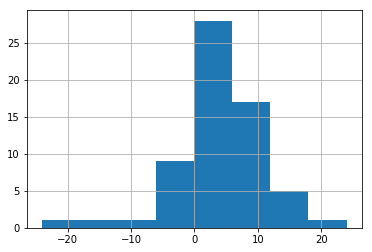

In [49]:
print(corpus_df.Sentiment.value_counts())
print("\n~~~~~~~~~~~~~~~\n")

# summary statistics
print(corpus_df.Score.describe())

# histogram
corpus_df.Score.hist(bins=8)

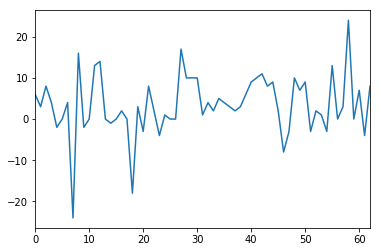

In [50]:
# sentiment scores over time ...

corpus_df.Score.plot()

#### Explores "Mystery" Quotes
I assigned sentiment label "Mystery" when no terms in the text were found in the sentiment dictionary.

I should probably add some terms to sentiment dictionary (or maybe adjust form of words).  E.g., weaponized, threats, outgunned have negative sentiment, and maybe associate with the emotion 'fear' as well.

It is surprising there are no matching terms in Idx 59 about AI replacing repetitive jobs.

Some quotes just don't convey much.

Idx 15: "By the end of next year, we're likely to see something." - *vague, but maybe expresses anticipation*

In [51]:
corpus_df[corpus_df.Sentiment=='Mystery'] \
    [['Quote', 'Attribution', 'Quote_Lem']]

,Quote,Attribution,Quote_Lem
5,"These platforms have been weaponized, and these aren't hypothetical threats.","Hany Farid, a computer science professor at the University of California, Berkeley, on deepfakes.","platform weaponized, not hypothetical threats."
13,"That's the last thing I want to do, is have robots make pizzas.","Ritch Allison, chief executive of Domino's Pizza Inc.","thing want do, robot make pizzas."
15,"By the end of next year, we're very likely to see something.","Adam Kujawa, director of Malwarebytes Labs, on AI-powered cyber attacks.","end year, likely something."
17,We are outgunned.,"Hany Farid, a computer-science professor and digital-forensics expert at the University of California at Berkeley.",outgunned.
25,The conversation about ethics has gotten really loud.,Deloitte Managing Director David Schatsky,conversation ethic gotten really loud.
59,AI will increasingly replace repetitive jobs. Not just for blue-collar work but a lot of white-collar work.,AI venture capitalist Kai-Fu Lee on CBS's '60 Minutes',AI increasingly replace repetitive jobs. Not just blue-collar work lot white-collar work.


#### Explore "Neutral" Quotes
Score of zero where positive terms/emotions offset negative

Idx 26, 56 - Both express concern about misuse of technologies, should be a negative sentiment rather than neutral.

In [52]:
corpus_df[corpus_df.Sentiment=='Neutral'] \
    [['Quote', 'Attribution', 'Emotions', 'Word_Emotion_Match']]

,Quote,Attribution,Emotions,Word_Emotion_Match
10,"If you really fumble on the first one or two projects, it may take you a couple of years or even longer to recover and start again.","Landing.ai VP of transformation Dongyan Wang on AI project management, according to VentureBeat.",anticipation negative,"[fumble=negative, start=anticipation]"
26,"If you make a technology that can classify people by an ethnicity, someone will use it to repress that ethnicity.","Clare Garvie, an associate at the Center on Privacy and Technology at Georgetown Law.",negative positive sadness,"[technology=positive, classify=positive, repress=negative, repress=sadness]"
56,"We often see new surveillance technologies first applied to populations that are not going to object: prisoners, children, immigrants. You have to ask whether you want to raise a generation that is used to growing up in environments where they're electronically monitored by AI agents.",ACLU Senior Policy Analyst Jay Stanley tells Axios.,fear positive,"[surveillance=fear, technology=positive, population=positive]"


# Explore Most Positive and Negative Quotes

In [53]:
# Quotes with highest sentiment score = most positive

# some hits and some misses

# Idx  8 - not sure, it is strongly positive
# Idx 12 - more cautionary than positive
# Idx 11 - tone is positive (the implications may not be so positive for us)

corpus_df[['Quote', 'Attribution', 'Sentiment', 'Score', 'Emotions']] \
    .sort_values('Score', ascending=False) \
    .head(5)

,Quote,Attribution,Sentiment,Score,Emotions
58,If we can achieve true consciousness in machines ... then we can teach them to care.,"David Hanson Jr., founder and Chief Executive Officer of Hanson Robotics Ltd.",Positive,24,joy positive surprise trust
27,"So just as art for us as humans is a way of helping us get inside the mind of another human, maybe art produced by AI will help us get inside the workings of this code that is quite mysterious.","Marcus du Sautoy, mathematician and professor at Oxford University",Positive,17,anticipation fear joy positive sadness surprise
8,It will be the job of the next Commission to deliver something so that we have regulation similar to the General Data Protection Regulation that makes it clear that artificial intelligence serves humanity.,"German Chancellor Angela Merkel, according to Politico.",Positive,16,fear joy positive trust
12,"AI is only as good as the humans programming it and the system in which it operates. If we are not careful, AI could not make healthcare better, but instead unintentionally exacerbate many of the worst aspects of our current healthcare system.","Bob Kocher, M.D., adjunct professor at the Stanford University School of Medicine, and Zeke Emanuel, MD, PhD, chair of the Department of Medical Ethics and Health Policy at the University of Pennsylvania.",Positive,14,anticipation joy negative positive surprise trust
11,A good AI has a ridiculously unfair advantage against humans: They don't get tired. They don't get hungry. They don't deal with emotions.,"Michael ""Gags"" Gagliano, a professional poker player who lost to Pluribus",Positive,13,anger anticipation disgust joy negative positive sadness surprise trust


In [54]:
# Quotes with lowest sentiment score = most negative

# more hits and misses
# Idx 46 - I don't see focus of AI competition in semiconductor industry as a negative sentiment
# Idx 23 - not negative, actually kind of humorous to think about
# Idx 61 - unclear if humanization of AI is good thing or bad thing

corpus_df[['Quote', 'Attribution', 'Sentiment', 'Score', 'Emotions']] \
    .sort_values('Score', ascending=True) \
    .head(5)

,Quote,Attribution,Sentiment,Score,Emotions
7,"What if you get a cancer diagnosis, or you get a [reading] saying you're cancer free, and it turns out you have cancer -- who is going to be accountable for that?","Microsoft Cybersecurity Field CTO Diana Kelley speaking about AI decision-making at a recent RSA Security conference, according to ZDNet.",Negative,-24,anger anticipation disgust fear negative positive sadness trust
18,"Imagine the outrage if, upon dying, our bodies, thoughts and possessions could be taken and used in perpetuity by private enterprises. But that's essentially what we've allowed the digital world to do.","Darren Shou, vice president of research at Symantec.",Negative,-18,anger anticipation disgust fear negative positive sadness trust
46,"Other than military AI applications, the future focus of strategic national AI competition is likely to be the semiconductor industry, because the cutting edge of AI technology increasingly depends on custom computer chips.",Center for a New American Security,Negative,-8,anger anticipation disgust fear negative positive sadness
23,It's not like you can tell a donkey to stand still and raise its chin up slightly.,"Chen Zenghui, product director at animal-recognition software company Innovationai Co.",Negative,-4,disgust negative
61,The big changes this year versus last year is the humanization of AI and how completely ubiquitous it has become into our lives.,"Allan Cook, the digital reality business leader at Deloitte Digital.",Negative,-4,anger fear negative positive


# Explore Quotes by Emotion Expressed

## Anticipation

In [55]:
corpus_df[corpus_df.Emotions.str.contains('anticipation')] \
    [['Quote', 'Attribution', 'Sentiment', 'Score', 'Emotions']] \
    .sort_values('Score', ascending=False) \
    .head()

,Quote,Attribution,Sentiment,Score,Emotions
27,"So just as art for us as humans is a way of helping us get inside the mind of another human, maybe art produced by AI will help us get inside the workings of this code that is quite mysterious.","Marcus du Sautoy, mathematician and professor at Oxford University",Positive,17,anticipation fear joy positive sadness surprise
12,"AI is only as good as the humans programming it and the system in which it operates. If we are not careful, AI could not make healthcare better, but instead unintentionally exacerbate many of the worst aspects of our current healthcare system.","Bob Kocher, M.D., adjunct professor at the Stanford University School of Medicine, and Zeke Emanuel, MD, PhD, chair of the Department of Medical Ethics and Health Policy at the University of Pennsylvania.",Positive,14,anticipation joy negative positive surprise trust
55,"If you are a CIO and your organization doesn't use AI, chances are high that your competitors do and this should be a concern.","Chris Howard, Gartner Inc. research vice president.",Positive,13,anticipation joy positive surprise trust
11,A good AI has a ridiculously unfair advantage against humans: They don't get tired. They don't get hungry. They don't deal with emotions.,"Michael ""Gags"" Gagliano, a professional poker player who lost to Pluribus",Positive,13,anger anticipation disgust joy negative positive sadness surprise trust
30,"When I see it applied to something that without AI, it is just too complex, we never would have seen how that system works, that I feel like, 'Wow, that is a very good thing.'",Microsoft co-founder Bill Gates,Positive,10,anticipation joy positive surprise trust


## Disgust

In [56]:
corpus_df[corpus_df.Emotions.str.contains('disgust')] \
    [['Quote', 'Attribution', 'Sentiment', 'Score', 'Emotions']] \
    .sort_values('Score', ascending=False) \
    .head()

,Quote,Attribution,Sentiment,Score,Emotions
11,A good AI has a ridiculously unfair advantage against humans: They don't get tired. They don't get hungry. They don't deal with emotions.,"Michael ""Gags"" Gagliano, a professional poker player who lost to Pluribus",Positive,13,anger anticipation disgust joy negative positive sadness surprise trust
52,"The genie is out of the bottle. AI technology is in play and companies are going to use it, or else they won't remain competitive. But it's going to create a skills gap. Companies need to be prepared for the massive retraining that lies ahead.","Aneel Bhusri, Workday chief executive officer.",Positive,2,anger anticipation disgust joy negative positive sadness trust
51,"China isn't the only authoritarian regime in the world, but it's undoubtedly the wealthiest, strongest and most developed in machine learning and artificial intelligence. This makes [China's President] Xi Jinping the most dangerous opponent of those who believe in the concept of open society.",Billionaire investor George Soros,Negative,-3,anger anticipation disgust fear joy negative positive trust
23,It's not like you can tell a donkey to stand still and raise its chin up slightly.,"Chen Zenghui, product director at animal-recognition software company Innovationai Co.",Negative,-4,disgust negative
46,"Other than military AI applications, the future focus of strategic national AI competition is likely to be the semiconductor industry, because the cutting edge of AI technology increasingly depends on custom computer chips.",Center for a New American Security,Negative,-8,anger anticipation disgust fear negative positive sadness


## Word Cloud of Terms in Quotes - Just for Fun

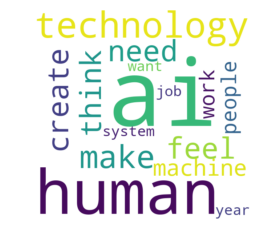

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

quote_words = ""
for text in corpus_df['Quote_Lem']:
    quote_words = quote_words + ' ' + text.lower().rstrip('?:!.,;')

my_stop_words = ['going', 'use', 'come', 'way', 'lot', 'not', 'no']
wordcloud = WordCloud(width=600, height=600, margin=0,
                      max_words=15,
                      stopwords=my_stop_words,
                      background_color="white").generate(quote_words)
# colormap="Blues"

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()